In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#loading the files

btc_url = r'https://raw.githubusercontent.com/romanorac/romanorac.github.io/master/assets/data/BTC_USD_Coinbase_hour_2017-12-24.csv'
btc_df = pd.read_csv(btc_url, index_col=0)

eth_url = r'https://raw.githubusercontent.com/romanorac/romanorac.github.io/master/assets/data/ETH_USD_Coinbase_hour_2017-12-24.csv'
eth_df = pd.read_csv(eth_url, index_col=0)

lte_url = r'https://raw.githubusercontent.com/romanorac/romanorac.github.io/master/assets/data/LTC_USD_Coinbase_hour_2017-12-24.csv'
lte_df = pd.read_csv(lte_url, index_col=0)

Viewing the DataBase


In [2]:
eth_df.head()

,low,high,open,close,volumefrom,volumeto
datetime,,,,,,
2017-10-02 08:00:00,301.15,301.69,301.30,301.37,740.70,223174.12
2017-10-02 09:00:00,301.32,301.84,301.37,301.84,853.67,257550.98
2017-10-02 10:00:00,301.30,301.95,301.84,301.95,801.42,241777.54
2017-10-02 11:00:00,300.02,302.00,301.95,300.02,1361.15,410165.38
2017-10-02 12:00:00,296.66,300.54,300.02,297.51,4610.19,1375251.38


In [3]:
btc_df.head()

,low,high,open,close,volumefrom,volumeto
datetime,,,,,,
2017-10-02 08:00:00,4435.00,4448.98,4435.01,4448.85,85.51,379813.67
2017-10-02 09:00:00,4448.84,4470.00,4448.85,4464.49,165.17,736269.53
2017-10-02 10:00:00,4450.27,4469.00,4464.49,4461.63,194.95,870013.62
2017-10-02 11:00:00,4399.00,4461.63,4461.63,4399.51,326.71,1445572.02
2017-10-02 12:00:00,4378.22,4417.91,4399.51,4383.00,549.29,2412712.73


In [4]:
lte_df.head()

,low,high,open,close,volumefrom,volumeto
datetime,,,,,,
2017-10-02 08:00:00,54.63,54.77,54.66,54.72,3304.78,180727.63
2017-10-02 09:00:00,54.62,54.88,54.72,54.79,3721.31,203679.63
2017-10-02 10:00:00,54.62,54.87,54.79,54.63,4211.34,230553.87
2017-10-02 11:00:00,54.00,54.69,54.63,54.01,13331.96,724762.10
2017-10-02 12:00:00,53.63,54.18,54.01,53.71,12489.88,673313.94


Main DataFrame


In [5]:
df = pd.DataFrame({'BTC':btc_df.close,
                  'ETH': eth_df.close,
                  'LTE': lte_df.close})

In [6]:
df.head()

,BTC,ETH,LTE
datetime,,,
2017-10-02 08:00:00,4448.85,301.37,54.72
2017-10-02 09:00:00,4464.49,301.84,54.79
2017-10-02 10:00:00,4461.63,301.95,54.63
2017-10-02 11:00:00,4399.51,300.02,54.01
2017-10-02 12:00:00,4383.00,297.51,53.71


Viewing the DataBase

In [7]:
df.describe()

,BTC,ETH,LTE
count,2001.000000,2001.000000,2001.000000
mean,9060.256122,407.263793,106.790100
std,4404.269591,149.480416,89.142241
min,4150.020000,277.810000,48.610000
25%,5751.020000,301.510000,55.580000
50%,7319.950000,330.800000,63.550000
75%,11305.000000,464.390000,100.050000
max,19847.110000,858.900000,378.660000


(array([-250.,    0.,  250.,  500.,  750., 1000., 1250., 1500., 1750.,
        2000., 2250.]), <a list of 11 Text major ticklabel objects>)

<Figure size 1440x720 with 0 Axes>

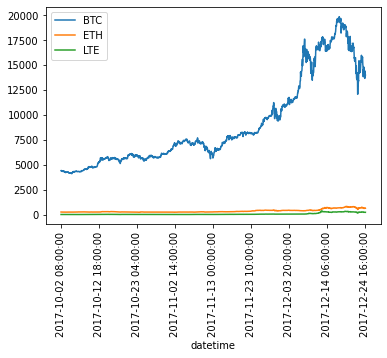

In [8]:
plt.figure(figsize=[20,10])
df.plot()
plt.xticks(rotation='vertical')

Correlation

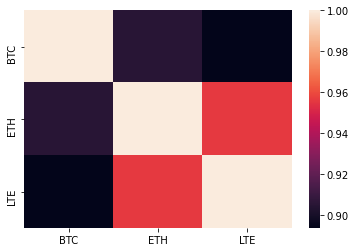

In [9]:
sns.heatmap(df.corr())

Missing values

In [10]:
df.isnull().sum()

BTC    0
ETH    0
LTE    0
dtype: int64

Modelling

In [11]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
df_scaled = scaler.fit_transform(df)
df_crypto = pd.DataFrame(df_scaled, columns=df.columns, index=df.index)


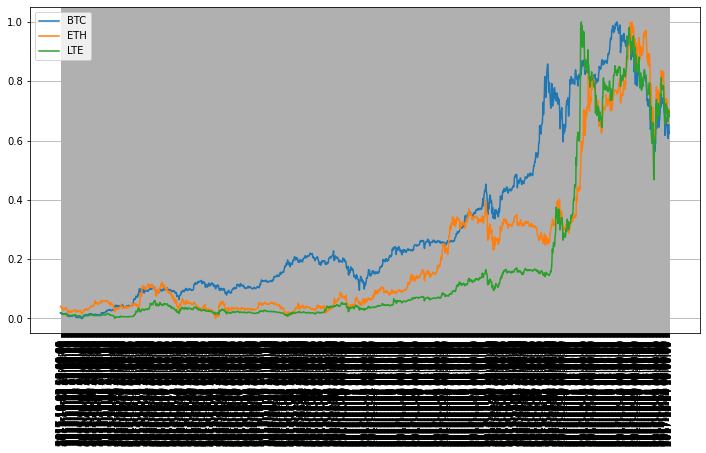

In [12]:
plt.figure(figsize=[12,6])
plt.grid()
plt.plot(df_crypto)
plt.xticks(rotation='vertical')
plt.legend(df_crypto.columns)

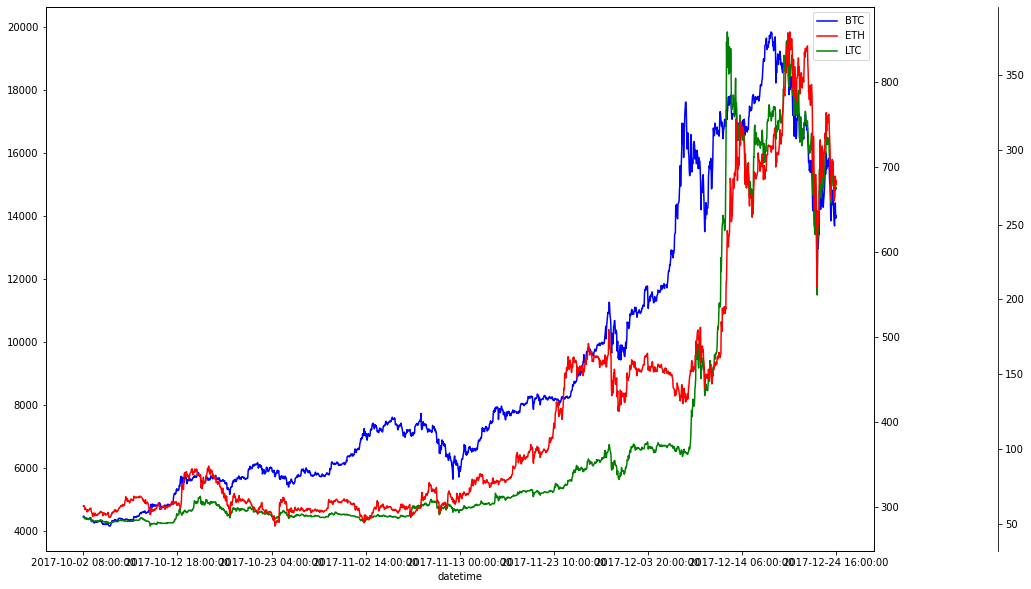

In [13]:
import matplotlib.pyplot as plt
import numpy as np
fig, ax1 = plt.subplots(figsize=(20, 10))
ax2 = ax1.twinx()
rspine = ax2.spines['right']
rspine.set_position(('axes', 1.15))
ax2.set_frame_on(True)
ax2.patch.set_visible(False)
fig.subplots_adjust(right=0.7)
df['BTC'].plot(ax=ax1, style='b-')
df['ETH'].plot(ax=ax1, style='r-', secondary_y=True)
df['LTE'].plot(ax=ax2, style='g-')
# legend
ax2.legend([ax1.get_lines()[0],
            ax1.right_ax.get_lines()[0],
            ax2.get_lines()[0]],
           ['BTC', 'ETH', 'LTC'])
plt.savefig('relative_crypto_prices.png')

Buy and Hold Strategy

In [14]:
df_return = df.apply(lambda x: x / x[0])
df_return.head()

,BTC,ETH,LTE
datetime,,,
2017-10-02 08:00:00,1.000000,1.000000,1.000000
2017-10-02 09:00:00,1.003516,1.001560,1.001279
2017-10-02 10:00:00,1.002873,1.001925,0.998355
2017-10-02 11:00:00,0.988909,0.995520,0.987025
2017-10-02 12:00:00,0.985198,0.987192,0.981542


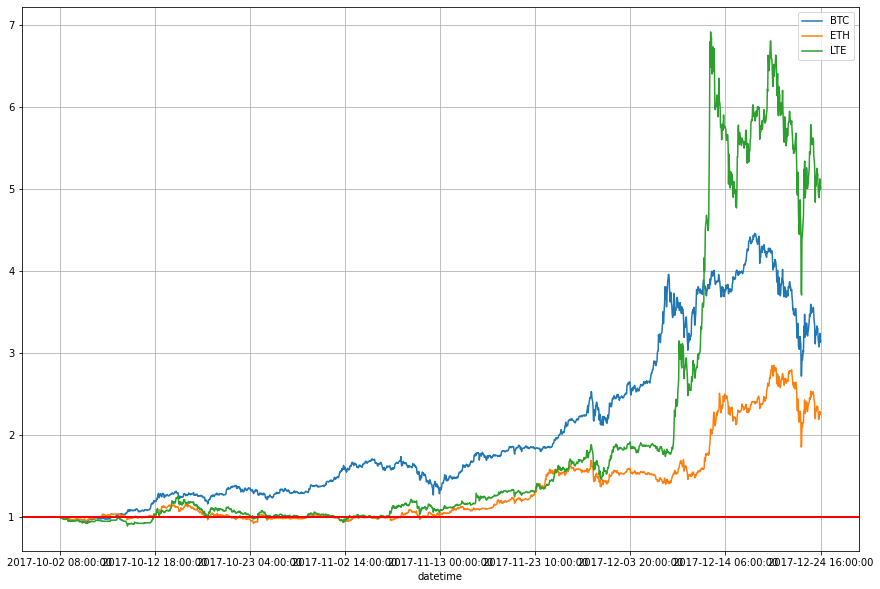

In [15]:
# Visualizing returns

df_return.plot(grid=True, figsize=(15, 10)).axhline(y = 1, color = "red", lw = 2)
plt.savefig('return_crypto_graph.png')

In [16]:
# Train Test Split

data = df.iloc[:, 0]
hist = []
target = []
length = 90
for i in range(len(data)-length):
    x = data[i:i+length]
    y = data[i+length]
    hist.append(x)
    target.append(y)

In [17]:
print(hist[1][89])
print(data[90])
print(target[0])


4318.59
4318.59
4318.59


In [18]:
# Converting to NumPy arrays

hist = np.array(hist)
target = np.array(target)
target = target.reshape(-1,1)

In [19]:
hist.shape
(1952, 90)
target.shape
(1952, 1)


(1952, 1)

In [21]:
# Transforming

hist_scaled = scaler.fit_transform(hist)
target_scaled = scaler.fit_transform(target)

In [22]:
hist_scaled = hist_scaled.reshape((len(hist_scaled), length, 1))
print(hist_scaled.shape)
(1952, 90, 1)

(1911, 90, 1)


(1952, 90, 1)

In [23]:
X_train = hist_scaled[:1900,:,:]
X_test = hist_scaled[1900:,:,:]
y_train = target_scaled[:1900,:]
y_test = target_scaled[1900:,:]

Building the Neural Network

In [24]:
import tensorflow as tf
from tensorflow.keras import layers

In [25]:
model = tf.keras.Sequential()
model.add(layers.LSTM(units=32, return_sequences=True,
                  input_shape=(90,1), dropout=0.2))
model.add(layers.LSTM(units=32, return_sequences=True,
                  dropout=0.2))
model.add(layers.LSTM(units=32, dropout=0.2))
model.add(layers.Dense(units=1))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 90, 32)            4352      
_________________________________________________________________
lstm_1 (LSTM)                (None, 90, 32)            8320      
_________________________________________________________________
lstm_2 (LSTM)                (None, 32)                8320      
_________________________________________________________________
dense (Dense)                (None, 1)                 33        
Total params: 21,025
Trainable params: 21,025
Non-trainable params: 0
_________________________________________________________________


In [26]:
model.compile(optimizer='adam', loss='mean_squared_error')

Tuning the model

In [27]:
history = model.fit(X_train, y_train, epochs=30, batch_size=32)

Epoch 1/30
60/60 [==============================] - 6s 96ms/step - loss: 0.0162
Epoch 2/30
60/60 [==============================] - 6s 101ms/step - loss: 0.0029
Epoch 3/30
60/60 [==============================] - 6s 98ms/step - loss: 0.0027
Epoch 4/30
60/60 [==============================] - 6s 96ms/step - loss: 0.0027
Epoch 5/30
60/60 [==============================] - 6s 98ms/step - loss: 0.0025
Epoch 6/30
60/60 [==============================] - 6s 99ms/step - loss: 0.0023
Epoch 7/30
60/60 [==============================] - 6s 98ms/step - loss: 0.0025
Epoch 8/30
60/60 [==============================] - 6s 98ms/step - loss: 0.0021
Epoch 9/30
60/60 [==============================] - 6s 98ms/step - loss: 0.0021
Epoch 10/30
60/60 [==============================] - 6s 97ms/step - loss: 0.0022
Epoch 11/30
60/60 [==============================] - 6s 97ms/step - loss: 0.0021
Epoch 12/30
60/60 [==============================] - 6s 98ms/step - loss: 0.0023
Epoch 13/30
60/60 [=================

Visualizing the Loss

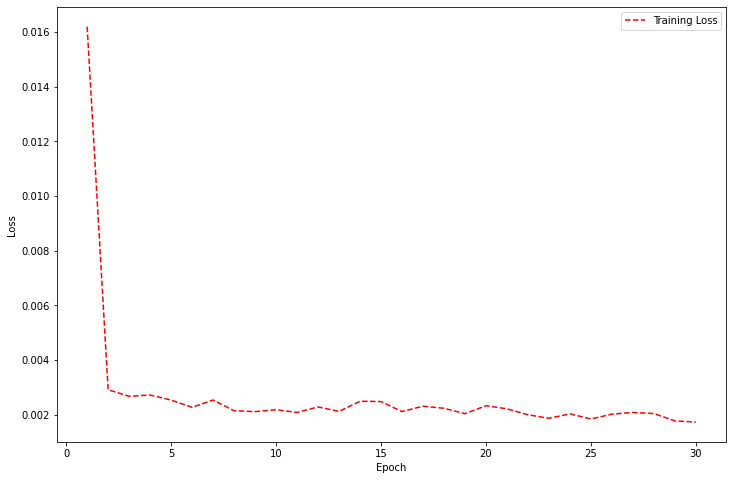

In [28]:
loss = history.history['loss']
epoch_count = range(1, len(loss) + 1)
plt.figure(figsize=(12,8))
plt.plot(epoch_count, loss, 'r--')
plt.legend(['Training Loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show();

Predictions

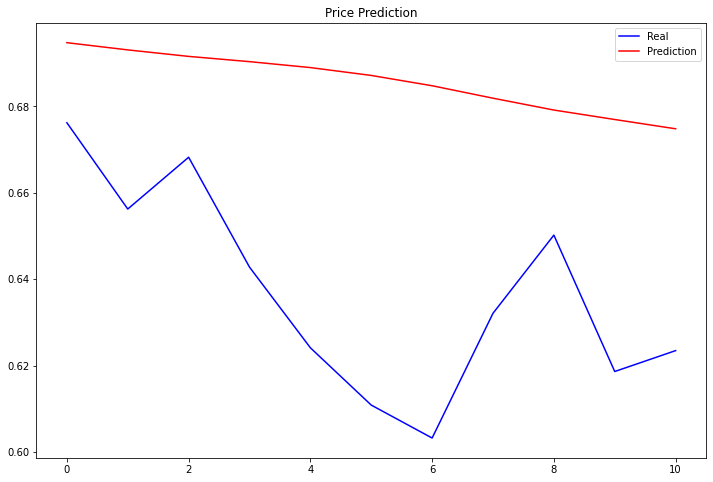

In [30]:
pred = model.predict(X_test)
plt.figure(figsize=(12,8))
plt.plot(y_test, color='blue', label='Real')
plt.plot(pred, color='red', label='Prediction')
plt.title('Price Prediction')
plt.legend()
plt.show()

In [32]:
pred_transformed = scaler.inverse_transform(pred)
y_test_transformed = scaler.inverse_transform(y_test)